In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

In [2]:
data = pd.read_csv(r"C:\Users\Akanksha\Desktop\Heart disease prediction research\Dataset3\archive\train.csv")
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
# About Dataset- 
# id: An identifier or index for each individual in the dataset.
# age: Age of the individual in years.
# education: Level of education of the individual, represented by a numerical scale (e.g., 1 for some high school, 2 for high school graduate, 3 for some college or vocational school, 4 for college graduate).
# sex: Gender of the individual (M for male, F for female).
# is_smoking: Indicates whether the individual is a smoker or not (YES for smoker, NO for non-smoker).
# cigsPerDay: The number of cigarettes smoked per day by the individual.
# BPMeds: Indicates whether the individual is on blood pressure medication (0 for not on medication, 1 for on medication).
# prevalentStroke: Indicates whether the individual has a history of stroke (0 for no history, 1 for history of stroke).
# prevalentHyp: Indicates whether the individual has hypertension (high blood pressure) (0 for no hypertension, 1 for hypertension).
# diabetes: Indicates whether the individual has diabetes (0 for no diabetes, 1 for diabetes).
# totChol: Total cholesterol level of the individual in milligrams per deciliter (mg/dL).
# sysBP: Systolic blood pressure of the individual in millimeters of mercury (mmHg).
# diaBP: Diastolic blood pressure of the individual in mmHg.
# BMI: Body mass index of the individual, which is a measure of body fat based on height and weight.
# heartRate: Resting heart rate of the individual in beats per minute (bpm).
# glucose: Blood glucose level of the individual in mg/dL.
# TenYearCHD: Indicates whether the individual developed coronary heart disease within ten years of the dataset (0 for no occurrence, 1 for occurrence).

In [4]:
data.shape

(3390, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

# FILLING MISSING VALUES BY MEAN-

In [6]:
# Display numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numerical_columns)

# Display basic information about missing values in the dataset
print("\nMissing value information:")
print(data[numerical_columns].isnull().sum())

# Fill missing values using different strategies
# Example: filling missing numerical values with mean
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].mean())

# Display basic information again to confirm missing values have been filled
print("\nAfter filling missing values:")
print(data[numerical_columns].isnull().sum())


Numerical columns:
Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Missing value information:
id                   0
age                  0
education           87
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

After filling missing values:
id                 0
age                0
education          0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [7]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.005915,11.840458,0.169190,0.080309,0.464719,0.158153,44.993041,22.29203,12.023581,4.106939,11.970102,23.131808,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
data.duplicated().any()

False

# Converting categorical variables to numerical by label encoding

In [9]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'status'.
data['sex']= label_encoder.fit_transform(data['sex'])
data['sex'].unique()

array([0, 1])

In [10]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'status'.
data['is_smoking']= label_encoder.fit_transform(data['is_smoking'])
data['is_smoking'].unique()

array([1, 0])

In [11]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


# VISUALIZATION

In [12]:
data.corr()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030236,0.001004,-0.001511,-0.017192,0.007034,-0.038873,0.013236,0.003690,-0.019782,0.019676,0.000832,0.039750,0.024683,0.014876,0.009866
age,0.016759,1.000000,-0.170243,-0.041882,-0.210997,-0.191956,0.123262,0.059038,0.308826,0.107875,0.272209,0.404845,0.221896,0.137645,-0.002595,0.111241,0.224927
education,-0.030236,-0.170243,1.000000,0.029794,0.027527,0.010945,-0.019474,-0.034191,-0.083753,-0.051115,-0.020170,-0.135743,-0.060218,-0.131656,-0.046489,-0.036360,-0.052074
sex,0.001004,-0.041882,0.029794,1.000000,0.215485,0.331062,-0.044046,-0.011273,0.003072,0.008853,-0.070591,-0.037369,0.058840,0.087031,-0.118680,-0.007286,0.084647
is_smoking,-0.001511,-0.210997,0.027527,0.215485,1.000000,0.769711,-0.037738,-0.043703,-0.119325,-0.053333,-0.046800,-0.145721,-0.124318,-0.172709,0.062176,-0.058729,0.034143
cigsPerDay,-0.017192,-0.191956,0.010945,0.331062,0.769711,1.000000,-0.036823,-0.042056,-0.079093,-0.049012,-0.024425,-0.100545,-0.068551,-0.100712,0.066514,-0.065553,0.066686
BPMeds,0.007034,0.123262,-0.019474,-0.044046,-0.037738,-0.036823,1.000000,0.116670,0.257518,0.070904,0.081381,0.261210,0.199135,0.087301,0.018041,0.061365,0.087420
prevalentStroke,-0.038873,0.059038,-0.034191,-0.011273,-0.043703,-0.042056,0.116670,1.000000,0.071652,0.010115,-0.010831,0.057568,0.047235,0.017741,-0.019184,0.023061,0.068627
prevalentHyp,0.013236,0.308826,-0.083753,0.003072,-0.119325,-0.079093,0.257518,0.071652,1.000000,0.082565,0.158741,0.699285,0.612897,0.299723,0.150766,0.082747,0.166544
diabetes,0.003690,0.107875,-0.051115,0.008853,-0.053333,-0.049012,0.070904,0.010115,0.082565,1.000000,0.059072,0.124011,0.061165,0.088104,0.039742,0.608937,0.103681


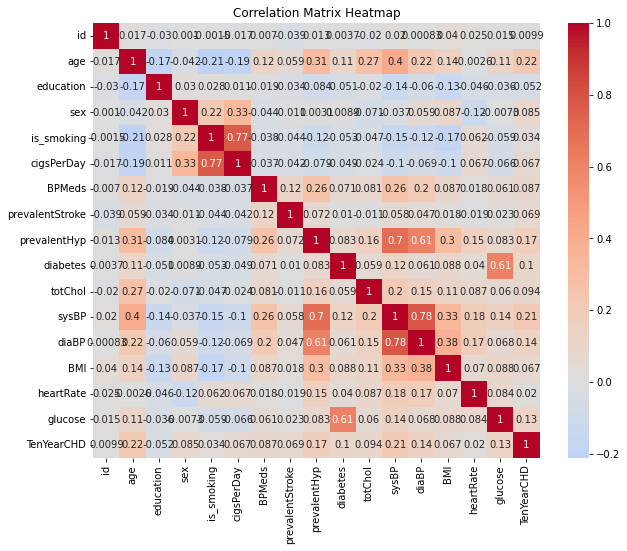

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

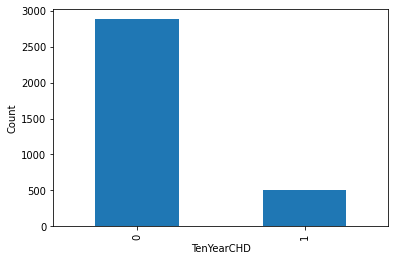

In [14]:
data.TenYearCHD.value_counts().plot(kind='bar')
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.show()

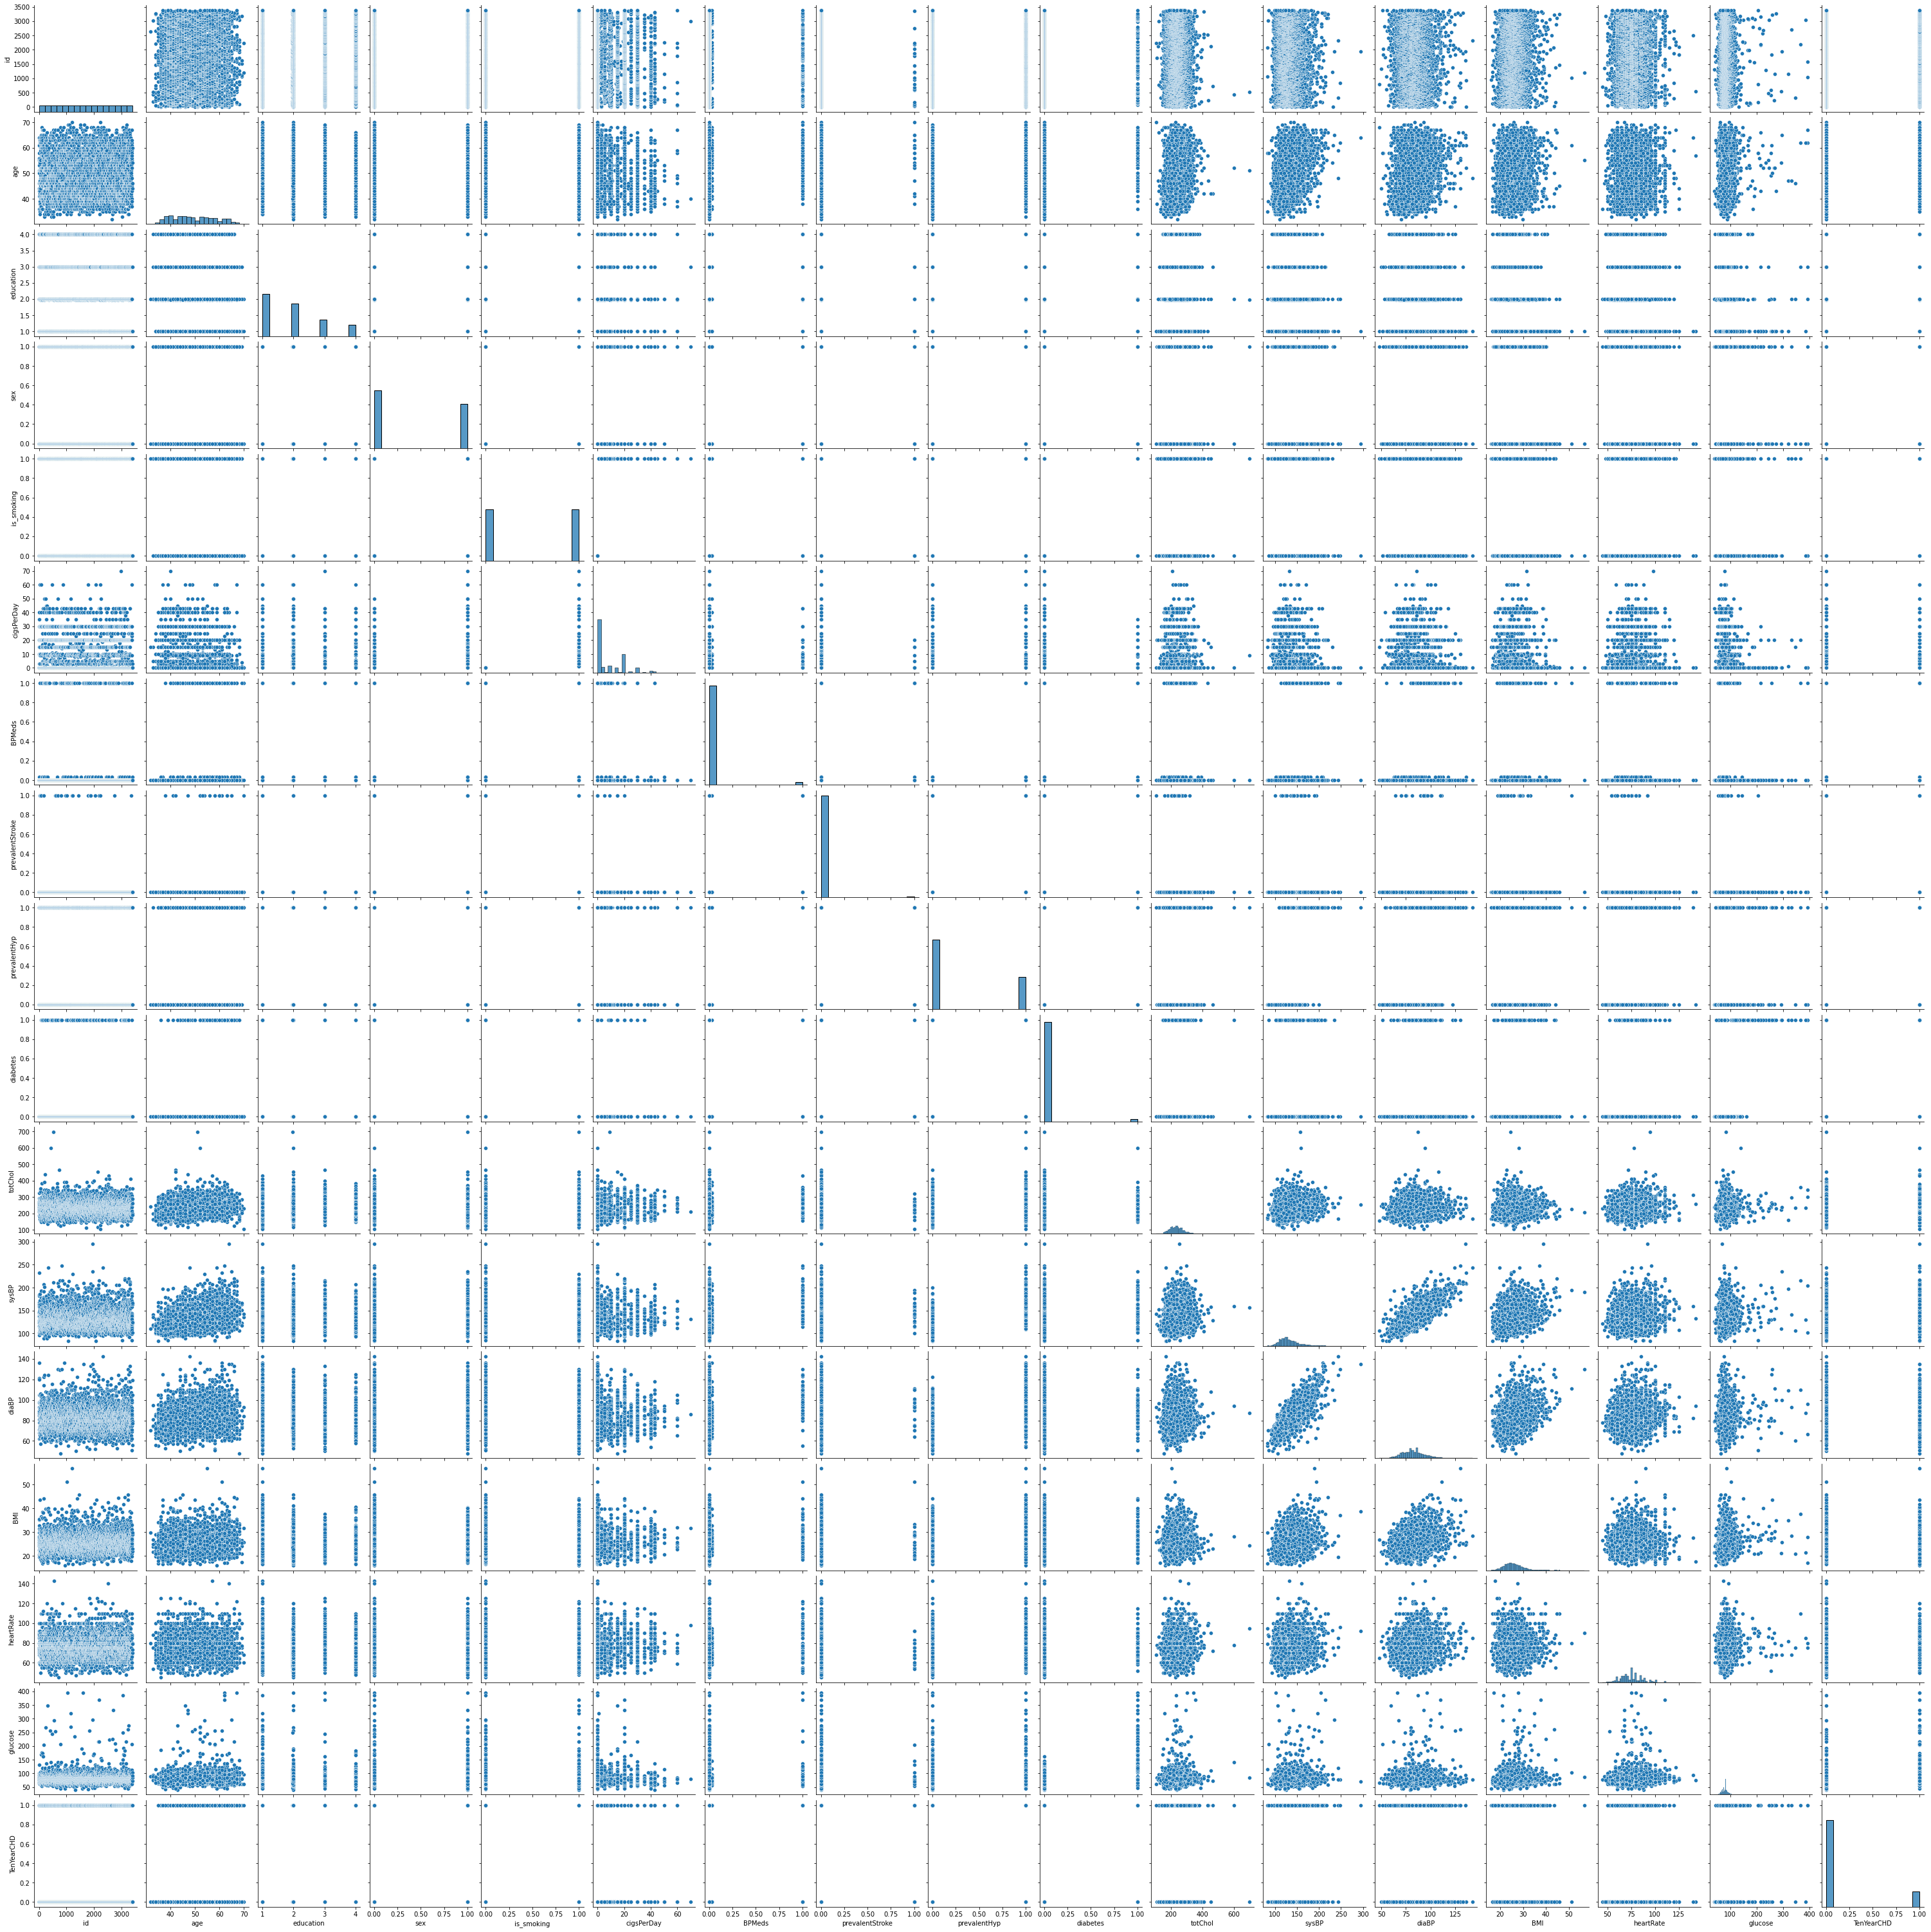

In [15]:
sns.pairplot(data)
plt.show()

<Figure size 2088x432 with 0 Axes>

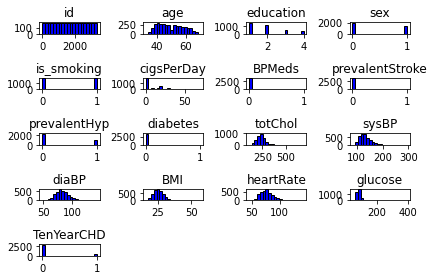

In [16]:
plt.figure(figsize=(29, 6))
data.hist(bins=20, color='blue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

# HANDLING IMBALANCED DATASET

In [17]:
data.groupby("TenYearCHD").count()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,,
0,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879,2879
1,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511,511


In [18]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

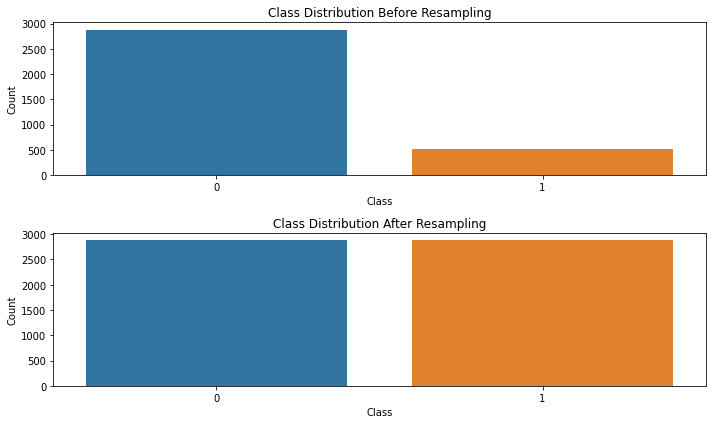

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and the target variable
x = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Count the occurrences of each class before resampling
class_counts_before = y.value_counts()

# Apply random oversampling
oversampler = RandomOverSampler()
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# Count the occurrences of each class after resampling
class_counts_after = pd.Series(y_resampled).value_counts()

# Plot the class distribution before and after resampling
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=class_counts_before.index, y=class_counts_before.values)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.barplot(x=class_counts_after.index, y=class_counts_after.values)
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [20]:
data_resampled = pd.concat([x_resampled, y_resampled], axis=1)
data_resampled.to_csv('your_dataset_resampled.csv', index=False)

In [21]:
res_data = pd.read_csv(r"your_dataset_resampled.csv")
res_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [22]:
res_data['TenYearCHD'].value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

# FEATURE SELECTION 

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

# Split the dataset into features (X) and target labels (y)
x = res_data.drop('TenYearCHD', axis=1)  # Adjust the target column name
y = res_data['TenYearCHD']

# Get the names of the features
feature_names = x.columns

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with chi-squared scoring
num_features_to_select = 9 # Choose the number of features you want to select
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

# Get the selected feature names
selected_feature_names = feature_names[selector.get_support()]

# Print the selected feature names
print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['id', 'age', 'cigsPerDay', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'glucose'],
      dtype='object')


# CLASSIFICATION MODELS 

In [24]:
from sklearn.preprocessing import StandardScaler
import joblib

# Load your training dataset 
train_data = res_data
# Load your testing dataset 
test_data = pd.read_csv(r'C:\Users\Akanksha\Desktop\Heart disease prediction research\Dataset3\archive\test.csv')

# # Split the training dataset into features (X_train) and target labels (y_train)
# x_train = train_data.drop('TenYearCHD', axis=1)
# y_train = train_data['TenYearCHD']

# # Split the testing dataset into features (X_test) and target labels (y_test)
# x_test = test_data.drop('TenYearCHD', axis=1)
# y_test = test_data['TenYearCHD']

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize and train multiple classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Boosting': AdaBoostClassifier()
}

trained_models = {}
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    trained_models[name] = clf
    print(f"{name} trained.")

# Save the trained models using joblib
for name, clf in trained_models.items():
    model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(clf, model_filename)
    print(f"{name} model saved as {model_filename}")

# Load the trained models from files and evaluate on the testing dataset
for name in trained_models.keys():
    model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    loaded_model = joblib.load(model_filename)
    y_pred = loaded_model.predict(x_test)
    print(f"\n{name} Model Evaluation:\n")
    print(classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))


Logistic Regression trained.
K-Nearest Neighbors trained.
Support Vector Machine trained.
Naive Bayes trained.
Decision Tree trained.
Random Forest trained.
Bagging trained.
Boosting trained.
Logistic Regression model saved as logistic_regression_model.pkl
K-Nearest Neighbors model saved as k-nearest_neighbors_model.pkl
Support Vector Machine model saved as support_vector_machine_model.pkl
Naive Bayes model saved as naive_bayes_model.pkl
Decision Tree model saved as decision_tree_model.pkl
Random Forest model saved as random_forest_model.pkl
Bagging model saved as bagging_model.pkl
Boosting model saved as boosting_model.pkl

Logistic Regression Model Evaluation:

                  precision    recall  f1-score   support

No Heart Disease       0.69      0.69      0.69       589
   Heart Disease       0.67      0.67      0.67       563

        accuracy                           0.68      1152
       macro avg       0.68      0.68      0.68      1152
    weighted avg       0.68      0.6

# CROSS VALIDATION ON K-Nearest Neighbors Model, Decision Tree Model, Random Forest Model, Bagging Model

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)
from sklearn.model_selection import cross_val_score

In [26]:
# list of models
models = [KNeighborsClassifier(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          BaggingClassifier()]

In [27]:
def compare_models_cross_validation():

    for model in models:
        cv_score = cross_val_score(model, x,y, cv=10)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        print('Cross Validation accuracies for ', model, '=  ', cv_score)
        print('Accuracy % of the ', model, mean_accuracy)
        print(' ')
        print('----------------------------------------------')

In [28]:
compare_models_cross_validation()

Cross Validation accuracies for  KNeighborsClassifier() =   [0.46354167 0.484375   0.49479167 0.52430556 0.49305556 0.49826389
 0.49652778 0.49479167 0.51130435 0.48      ]
Accuracy % of the  KNeighborsClassifier() 49.41
 
----------------------------------------------
Cross Validation accuracies for  DecisionTreeClassifier() =   [0.55381944 0.73611111 0.81076389 0.890625   0.91319444 0.90451389
 0.81770833 0.88020833 0.85913043 0.50608696]
Accuracy % of the  DecisionTreeClassifier() 78.72
 
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.51041667 0.88194444 0.96180556 0.97048611 0.97222222 0.94444444
 0.92013889 0.94965278 0.87478261 0.5026087 ]
Accuracy % of the  RandomForestClassifier() 84.89
 
----------------------------------------------
Cross Validation accuracies for  BaggingClassifier() =   [0.51388889 0.75173611 0.86111111 0.92013889 0.94270833 0.93923611
 0.89583333 0.921875   0.87130435 0.50608696]
Accuracy % o

In [29]:
# This shows Random forest works good when SELECKBEST is used for
# feature selection and cross validation score is used 

# Parameter Tuning Using K-Fold for Random Forest Classifier 

In [30]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=1),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=5 and CV=10 :",np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.7344909993792674


In [31]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=5 and CV=10 :",np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.8725853507138422


In [32]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=20 and CV=10 :",np.average(scores1))

Avg Score for Estimators=20 and CV=10 : 0.933792675356921


In [33]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=30 and CV=10 :",np.average(scores1))

Avg Score for Estimators=30 and CV=10 : 0.9426691495965238


In [34]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=40 and CV=10 :",np.average(scores1))

Avg Score for Estimators=40 and CV=10 : 0.9460055865921786


#### Based on above observation,we choose
n_estimators = 30 and 
cv_score = 10 for Random Forest model